In [1]:
import os
from dotenv import load_dotenv

load_dotenv()


True

In [2]:
folder_path = os.getenv('INIT_FOLDER_PATH')
folder_path

'D:\\abo\\'

In [3]:
import pandas as pd
import os.path

images_path = os.path.join(folder_path, 'images')

images_meta_path = os.path.join(images_path, 'metadata','images.csv')

images_meta = pd.read_csv(images_meta_path)

images_meta

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg
...,...,...,...,...
398207,B1zv8OpTkBS,2560,2560,6d/6d49d130.jpg
398208,B1zwflWhPIS,2560,2560,b1/b163e0ea.jpg
398209,C1lf45DhhRS,2560,2560,a1/a116d9d1.jpg
398210,C1pEt6jBLiS,2560,2560,9c/9c3e1158.jpg


In [26]:
#create helper funcs

def get_image_att(image_id):
    
    record = images_meta[images_meta.image_id == image_id]
    
    if len(record)>0 and len(record['height'])>0 and len(record['width'])>0 and len(record['path'])>0:
        
        record = record.iloc[0]
        
        return  {
            'height':record['height'],
            'width':record['width'],
            'path':record['path'],
        }
    return {}
    
get_image_att('718mYsQTQbL')

{'height': 1923, 'width': 1627, 'path': '4c/4c533ad7.jpg'}

In [22]:
from os import listdir
from os.path import isfile, join

listings_path = os.path.join(folder_path, 'listings','metadata')

onlyfiles = [f for f in listdir(listings_path) if isfile(join(listings_path, f))]
onlyfiles

['listings_0.json',
 'listings_1.json',
 'listings_2.json',
 'listings_3.json',
 'listings_4.json',
 'listings_5.json',
 'listings_6.json',
 'listings_7.json',
 'listings_8.json',
 'listings_9.json',
 'listings_a.json',
 'listings_b.json',
 'listings_c.json',
 'listings_d.json',
 'listings_e.json',
 'listings_f.json']

In [6]:
import json
import pprint

item_dict = {}

for filename in onlyfiles:
    first_path = os.path.join(listings_path, filename)
    file1 = open(first_path, 'r')
    Lines = file1.readlines()
    count = 0
    for line in Lines:
        # print(line)
        dict = json.loads(line)
        if 'main_image_id' in dict:
            main_image_id = dict['main_image_id']
            item_dict[main_image_id] = dict



{'brand': [{'language_tag': 'de_DE', 'value': 'Amazon Essentials'}],
 'bullet_point': [{'language_tag': 'de_DE',
   'value': 'Fällt gross aus; eventuell eine Größe kleiner bestellen'}],
 'color': [{'language_tag': 'de_DE', 'value': 'Mehrfarbig(Girl Fruit)'}],
 'fabric_type': [{'language_tag': 'en_GB', 'value': '100% Cotton'},
  {'language_tag': 'de_DE', 'value': '100 % Baumwolle'}],
 'item_id': 'B07HL25ZQM',
 'item_name': [{'language_tag': 'en_GB',
   'value': 'Amazon Essentials Bib Set of 6'},
  {'language_tag': 'de_DE',
   'value': 'Amazon Essentials 6-Pack Bib Set, Mehrfarbig(Girl Fruit), Einheitsgröße'}],
 'model_name': [{'language_tag': 'en_GB', 'value': '6-Pack Bib Set'},
  {'language_tag': 'de_DE', 'value': '6-Pack Bib Set'}],
 'model_number': [{'value': 'P_AE3131_M6'}],
 'product_type': [{'value': 'BABY_PRODUCT'}],
 'style': [{'language_tag': 'de_DE', 'value': '6-Pack Bib Set'}],
 'main_image_id': '718mYsQTQbL',
 'country': 'DE',
 'marketplace': 'Amazon',
 'domain_name': 'amazo

In [30]:
item_dict['01dkn0Gyx0L']

{'brand': [{'language_tag': 'it_IT', 'value': 'UMI'}],
 'item_id': 'B07Y7M4JZ2',
 'item_name': [{'language_tag': 'it_IT',
   'value': 'Set of 6 Highball Clear Glass 350ml Water Juice Cocktail …'}],
 'product_type': [{'value': 'KITCHEN'}],
 'main_image_id': '01dkn0Gyx0L',
 'item_keywords': [{'language_tag': 'it_IT',
   'value': 'bicchieri highball^bicchieri highball di base^set di bicchieri highball^bicchieri per bevande^bicchieri multiuso^bicchieri di vetro trasparente'}],
 'country': 'IT',
 'marketplace': 'Amazon',
 'domain_name': 'amazon.it',
 'node': [{'node_id': 652623031,
   'node_name': '/Categorie/Stoviglie/Bicchieri e cristalli/Bicchieri per Cocktail'}]}

In [31]:
get_image_att('01dkn0Gyx0L')

{'height': 122, 'width': 122, 'path': 'da/daab0cad.jpg'}

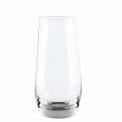

In [32]:
from IPython.display import Image

image_path_loc = get_image_att('01dkn0Gyx0L')['path']

splitted = image_path_loc.split('/')

image_path = os.path.join(images_path,'small',splitted[0],splitted[1])

Image(image_path)

In [33]:
item_dict['01dkn0Gyx0L']['item_name'][0]['value']

'Set of 6 Highball Clear Glass 350ml Water Juice Cocktail …'

In [34]:
item_dict['01dkn0Gyx0L']['product_type'][0]['value']

'KITCHEN'

In [35]:
item_dict['01dkn0Gyx0L'][ 'item_keywords'][0]['value']

'bicchieri highball^bicchieri highball di base^set di bicchieri highball^bicchieri per bevande^bicchieri multiuso^bicchieri di vetro trasparente'